Ссылка на репозиторий проекта:
https://github.com/andrew-tvorogov/practicum_learning_with_teacher

<span style="font-size: 20px; font-weight: 600">Персонализация предложений постоянным клиентам компании "В один клик".</span>

<b>Заказчик исследования:</b>
- интернет-магазин «В один клик»

<b>Источник данных:</b>
- собственные данные компании "В один клик"

<b>Содержание данных:</b>
- данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении;
- данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом;
- данные о времени (в минутах), которое покупатель провёл на сайте в течение периода;
- данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

<b>Порядок проведения исследования:</b>
- загрузить данные;
- изучить данные;
- выполнить предобработку данных;
- провести исследовательский анализ;
- объединить таблицы;
- провести корреляционный анализ признаков датасета;
- выбрать лучшую модель;
    - создать пайплан обработки признаков;
    - создать пайплайн выбора лучшей модели.
- провести анализ важности признаков;
- провести сегментацию покупателей;
- сделать общий вывод на основе готовых моделей.

<b>Задача:</b>
<p>Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.</p>

<b>Цель исследования:</b>
- рост прибыли за счёт увеличения активности покупателей.

<b>Описание данных:</b>

Данные доступны в четырёх файлах.
- ``market_file.csv`` - содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении;
- ``market_money.csv`` - содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом;
- ``market_time.csv`` - данныме о времени (в минутах), которое покупатель провёл на сайте в течение периода;
- ``money.csv`` - данные о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

Файл ``market_file.csv``:
<pre>
<b>id</b> — номер покупателя в корпоративной базе данных.
<b>Покупательская активность</b> — рассчитанный класс покупательской активности (целевой признак):<br>«снизилась» или «прежний уровень».
<b>Тип сервиса</b> — уровень сервиса, например «премиум» и «стандарт».
<b>Разрешить сообщать</b> — информация о том, можно ли присылать покупателю дополнительные предложения о товаре.<br>Согласие на это даёт покупатель.
<b>Маркет_актив_6_мес</b> — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя<br>за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
<b>Маркет_актив_тек_мес</b> — количество маркетинговых коммуникаций в текущем месяце.
<b>Длительность</b> — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
<b>Акционные_покупки</b> — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
<b>Популярная_категория</b> — самая популярная категория товаров у покупателя за последние 6 месяцев.
<b>Средний_просмотр_категорий_за_визит</b> — показывает, сколько в среднем категорий покупатель просмотрел за визит<br>в течение последнего месяца.
<b>Неоплаченные_продукты_штук_квартал</b> — общее число неоплаченных товаров в корзине за последние 3 месяца.
<b>Ошибка_сервиса</b> — число сбоев, которые коснулись покупателя во время посещения сайта.
<b>Страниц_за_визит</b> — среднее количество страниц, которые просмотрел покупатель за один визит на сайт<br>за последние 3 месяца.
</pre>

Файл ``market_money.csv``:
<pre>
<b>id</b> — номер покупателя в корпоративной базе данных.
<b>Период</b> — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
<b>Выручка</b> — сумма выручки за период.
</pre>

Файл ``market_time.csv``:
<pre>
<b>id</b> — номер покупателя в корпоративной базе данных.
<b>Период</b> — название периода, во время которого зафиксировано общее время.
<b>минут</b> — значение времени, проведённого на сайте, в минутах.
</pre>

Файл ``money.csv``:
<pre>
<b>id</b> — номер покупателя в корпоративной базе данных.
<b>Прибыль</b> — значение прибыли.
</pre>

In [1]:
# установка пакетов
!pip install shap --quiet # SHapley Additive exPlanations
!pip install phik --quiet # correlation analyzer library

In [2]:
# Загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt # для диаграмм
import math # для диаграмм
import numpy as np # для равномерного распределения значений на диаграмме
import seaborn as sns
import shap # оценка вклада признака
import phik

from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler, 
    OneHotEncoder, 
    OrdinalEncoder)

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

from warnings import simplefilter

In [3]:
# Функции приведения к единообразию (унификации)
# Пробелы заменят на "_", все символы приведут к нижнему регистру

def columns_names_unify(df):
    '''
    Заменит пробелы в именах колонок на "_", все символы приведет к нижнему регистру    
    '''
    df.columns = df.columns.str.replace(' ', '_', regex=True).str.lower()
    return df
    
def columns_values_unify(df):
    '''
    Заменит пробелы в значениях на "_", все символы приведет к нижнему регистру
    '''
    object_columns = df.select_dtypes('object').columns
    df[object_columns] = df.select_dtypes('object').apply(lambda x: x.str.replace(' ', '_', regex=True).str.lower())
    return df


# Функции графического отображения данных

def show_scatter(dataframe, x, y, cat_1, cat_2):
    '''
    Оторазит две диаграммы рассеяния
    '''
    _, ax = plt.subplots(1, 2, figsize=(16, 5)) # формируем сетку 1x2
    sns.scatterplot(data=dataframe, x=x, y=y, hue=cat_1, ax=ax[0]).set_title("Связь с учётом " + cat_1) ;
    sns.scatterplot(data=dataframe, x=x, y=y, hue=cat_2, ax=ax[1]).set_title("Связь с учётом " + cat_2) ;
    
def show_hist_selected(combined_dataset, x_field, x_label, title, bins, x_rotation = 0):
    '''
    Отобразит гистограмму по группам пользователей
    '''
    bins = np.linspace(0, bins, bins)
    plt.subplots(figsize=(15, 5))
    plt.hist(combined_dataset.query('группа == "остальные"')[x_field],\
         alpha=0.5, label='остальные', bins = bins, color=month_color)
    plt.hist(combined_dataset.query('группа == "исследуемая_группа"')[x_field],\
         alpha=0.5, label='исследуемая_группа', bins = bins, color=pre_month_color)
    plt.xlabel(x_label)
    plt.ylabel('Количество пользователей')
    plt.title(title)
    plt.xticks(rotation=x_rotation)
    plt.legend()
    plt.show()
    
    
# функция для отображения круговой диаграммы распределения количества элементов по категории
def show_category_pie(dataset, field, title):
    '''
    Отобразит круговую диаграмму распределения количества элементов по категории
    '''
    dataset[field]\
    .value_counts().plot(kind='pie', title = title + ', %', autopct='%1.0f%%', figsize=(7,7))
    plt.ylabel('')
    plt.show()        

# функция для отображения barh
def show_barh(dataset, field, title, x_label, y_label):
    '''
    Отобразит столбчатую гоизонтальныу диаграмму barh
    '''
    dataset[field].value_counts().sort_values().plot.barh(figsize=(15, 3))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label);
    
# функция для hist
def show_hist(dataset, field, title, x_label, y_label):
    '''
    Отобразит гистограмму
    '''
    dataset[field].hist(figsize=(15, 3), bins=10)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel( y_label);    

# функция для отображения количественных признаков в виде графиков - гистограммы и ящика с усами
def show_numeric_bplt_hist(df, variable, first_label, second_label, bins):
    '''
    Отобразит количественные признаки в виде графиков - гистограммы и ящика с усами
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.hist(df[variable], bins=bins)
    ax1.set_title('Гистограмма')
    ax1.set_xlabel(first_label)
    ax1.set_ylabel(second_label)    
    ax1.grid(True)    
    
    ax2.boxplot(df[variable], vert=False)
    ax2.set_title('Ящик с усами')
    ax2.set_xlabel(first_label)
    ax2.set_ylabel(second_label)
    ax2.grid(True)
    ax2.set_yticks([])

    plt.show()    

In [6]:
# инициализация глобальных переменных
RANDOM_STATE = 42 # Deep Thought number
TEST_SIZE = 0.25 # размер выборки

In [7]:
# настройки
pd.options.display.max_columns = None # необходимо чтобы head отобразил все колонки
plt.rcParams['figure.figsize'] = [15, 3] # размеры графика по умолчанию
sns.set(rc={'figure.figsize':(15, 10)}) # размеры графика seaborn по умолчанию
pd.set_option('display.float_format', '{:.6f}'.format) # отобразит в колонках округленные данные до 6-ти знаков

simplefilter(action='ignore', category=FutureWarning) # уберёт предупреждение "Set `keepdims`

## Загрузка и изучение данных

### Загрузка

In [8]:
# загрузка данных в датасеты
try:
    market_file = pd.read_csv('/datasets/market_file.csv')
    market_money = pd.read_csv('/datasets/market_money.csv')
    market_time = pd.read_csv('/datasets/market_time.csv')
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=",")    
except:
    print("Ошибка. Данные не загружены")

In [9]:
money

,id,Прибыль
0,215348,0.980000
1,215349,4.160000
2,215350,3.130000
3,215351,4.870000
4,215352,4.210000
...,...,...
1295,216643,4.440000
1296,216644,6.110000
1297,216645,3.290000
1298,216646,4.030000


<span style="color: #f85c00">При начальном изучении датасетов было обнаружено, что в качестве разделителя у датасета money.csv использован ";". Поэтому при загрузке был добавлен параметр sep=";". Кроме этого, для столбцов, явно содержащих данные "float64", был добавлен параметр decimal=',' для замены ',' на '.'. Так же это можно было сделать через replace и astype(float) в загруженном датасете.</span>

### Изучение данных

#### Структура, содержимое первых строк датасета ``market_file`` (данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении), пропуски

In [10]:
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [11]:
market_file.head(1)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.400000,5,121,0.000000,Товары для детей,6,2,1,5


In [12]:
market_file.isna().sum() # проверим на пропуски

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

<span style="color: darkgreen">Типы данных для датасета <b>market_file</b> корректны, пропусков в данных нет.</span>

#### Структура, содержимое первых строк датасета ``market_money`` ( данные о выручке, которую получает магазин с покупателя), пропуски

In [13]:
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [14]:
market_money.head(1)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.000000


In [15]:
market_money.isna().sum() # проверим на пропуски

id         0
Период     0
Выручка    0
dtype: int64

<span style="color: darkgreen">Типы данных для датасета <b>market_money</b> корректны, пропусков в данных нет.</span>

#### Структура, содержимое первых строк датасета ``market_time`` ( данные о времени, которое покупатель провёл на сайте), пропуски

In [16]:
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [17]:
market_time.head(1)

,id,Период,минут
0,215348,текущий_месяц,14


In [18]:
market_time.isna().sum() # проверим на пропуски

id        0
Период    0
минут     0
dtype: int64

<span style="color: darkgreen">Типы данных для датасета <b>market_time</b> корректны, пропусков в данных нет.</span>

#### Структура, содержимое первых строк датасета ``money`` (среднемесячная прибыль продавца), пропуски

In [19]:
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [20]:
money.head(1)

,id,Прибыль
0,215348,0.980000


In [21]:
money.isna().sum() # проверим на пропуски

id         0
Прибыль    0
dtype: int64

<span style="color: darkgreen">Типы данных для датасета <b>money</b> корректны, пропусков в данных нет.</span>

<b>Вывод:</b><br>
<div style='margin-top: 8px'>Данные во всех четырёх датасетах выглядят нормально, пропусков нет, типы данных соответствуют значениям.</div><br>
<div style="color: #f85c00">Наименования колонок в датасетах и строковые значения необходимо привести к единообразию. Например:
"Разрешить сообщать", "Маркет_актив_6_мес", "текущий_месяц" - часть наименований начинается с заглавной буквы, часть со строчной. Кроме того, разделители между словами "пробел" или знак "_".</div>

##  Предобработка данных

### Приведение наименований колонок и строковых значений к единообразию

После изучения датасетов, принято решение привести наименования колонок и "строковых" значений в них к единообразию - к нижнему регистру, а так же заменить символы " "(пробел) на "_".

In [22]:
# Цикл по датасетам, к каждому применена функиця "унификации"
# Пробелы заменят на "_", все символы приведут к нижнему регистру
for df in [market_file, market_money, market_time, money]:
    df = columns_names_unify(df)
    df = columns_values_unify(df)

### Датасет <span style="color: blue">market_file</span>. Проверка имён столбцов, наличия дубликатов.

#### Проверка имен столбцов

In [25]:
market_file.head(1)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.400000,5,121,0.000000,товары_для_детей,6,2,1,5


Имена столбцов ``market_file`` приведены к единообразию.

#### Проверка на дубликаты

##### Проверка на явные дубликаты датасет ``market_file``

In [26]:
market_file.duplicated().sum()

0

Явных дубликатов в датасете ``market_file`` - нет.

##### Проверка на скрытие дубли датасет ``market_file``

Проверим категориальные столбцы ``покупательская_активность``,``тип_сервиса``,``разрешить_сообщать``,``популярная_категория`` на скрытые дубли.

###### покупательская_активность

In [27]:
market_file['покупательская_активность'].unique()

array(['снизилась', 'прежний_уровень'], dtype=object)

Скрытых дублей нет.

###### тип_сервиса

In [28]:
market_file['тип_сервиса'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

In [29]:
service_type = market_file.groupby('тип_сервиса')['покупательская_активность'].agg('count')
service_type

тип_сервиса
премиум      376
стандарт     914
стандартт     10
Name: покупательская_активность, dtype: int64

"стандартт" - явно дубликат "стандарт". Заменим наименование колонки с двойным "тт" на конце на наименование с одним.

In [30]:
market_file.loc[market_file['тип_сервиса'] == 'стандартт', 'тип_сервиса'] = 'стандарт'

In [31]:
market_file.groupby('тип_сервиса')['покупательская_активность'].agg('count')

тип_сервиса
премиум     376
стандарт    924
Name: покупательская_активность, dtype: int64

Значения заменены успешно. Скрытых дублей нет.

###### разрешить_сообщать

In [32]:
market_file['разрешить_сообщать'].unique()

array(['да', 'нет'], dtype=object)

Скрытых дублей нет.

###### популярная_категория

In [33]:
market_file['популярная_категория'].unique()

array(['товары_для_детей', 'домашний_текстиль', 'косметика_и_аксесуары',
       'техника_для_красоты_и_здоровья', 'кухонная_посуда',
       'мелкая_бытовая_техника_и_электроника'], dtype=object)

Скрытых дублей нет.

##### Проверка на пропуски

In [34]:
market_file.isna().sum() # проверка на пропуски

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [35]:
market_file.shape

(1300, 13)

<b>Вывод:</b><br>
<div style='margin-top: 8px'>В датасете <span style="color: blue">market_file</span> нет дублей, пропусков, категориальные данные и наименования столбцов приведены к единообразию.</div><br>

### Датасет <span style="color: blue">market_money</span>. Проверка имён столбцов, наличия дубликатов.

#### Проверка имен столбцов

In [36]:
market_money.head(1)

,id,период,выручка
0,215348,препредыдущий_месяц,0.000000


Имена столбцов ``market_money`` приведены к единообразию.

#### Проверка на дубликаты

##### Проверка на явные дубликаты датасет ``market_money``

In [37]:
market_money.duplicated().sum()

0

Явных дубликатов в датасете ``market_money`` - нет.

##### Проверка на скрытые дубли датасет ``market_money``

Проверим категориальный столбец ``период`` на скрытые дубли.

In [38]:
market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Скрытых дублей в датасете ``market_money`` - нет.

##### Проверка на пропуски

In [39]:
market_money.isna().sum() # проверка на пропуски

id         0
период     0
выручка    0
dtype: int64

In [40]:
market_money.shape

(3900, 3)

<b>Вывод:</b><br>
<div style='margin-top: 8px'>В датасете <span style="color: blue">market_money</span> нет дублей, пропусков, категориальные данные и наименования столбцов приведены к единообразию.</div><br>

### Датасет <span style="color: blue">market_time</span>. Проверка имён столбцов, наличия дубликатов.

#### Проверка имен столбцов

In [41]:
market_time.head(1)

,id,период,минут
0,215348,текущий_месяц,14


Имена столбцов ``market_time`` приведены к единообразию.

#### Проверка на дубликаты

##### Проверка на явные дубликаты датасет ``market_time``

In [42]:
market_time.duplicated().sum()

0

Явных дубликатов в датасете ``market_time`` - нет.

##### Проверка на скрытие дубли датасет ``market_time``

In [43]:
market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

В периоде "предыдцщий_месяц" опечатка. Исправим её.

In [44]:
market_time.loc[market_time['период'] == 'предыдцщий_месяц', 'период'] = 'предыдущий_месяц'

In [45]:
market_time['период'].value_counts()

предыдущий_месяц    1300
текущий_месяц       1300
Name: период, dtype: int64

##### Проверка на пропуски

In [46]:
market_time.isna().sum() # проверка на пропуски

id        0
период    0
минут     0
dtype: int64

In [47]:
market_time.shape

(2600, 3)

<b>Вывод:</b><br>
<div style='margin-top: 8px'>В датасете <span style="color: blue">market_time</span> нет дублей, пропусков, категориальные данные и наименования столбцов приведены к единообразию.</div><br>

### Датасет <span style="color: blue">money</span>. Проверка имён столбцов, наличия дубликатов.

#### Проверка имен столбцов

In [48]:
money.head(1)

,id,прибыль
0,215348,0.980000


Имена столбцов ``money`` приведены к единообразию.

##### Проверка на явные дубликаты датасет ``money``

In [49]:
money.duplicated().sum()

0

Явных дубликатов в датасете ``money`` - нет.

##### Проверка на пропуски

In [50]:
money.isna().sum() # проверка на пропуски

id         0
прибыль    0
dtype: int64

In [51]:
money.shape

(1300, 2)

<b>Вывод:</b><br>
<div style='margin-top: 8px'>В датасете <span style="color: blue">money</span> нет дублей, пропусков, наименования столбцов приведены к единообразию.</div><br>

**Общий вывод:**
- во всех датасетах нет дублей; 
- во всех датасетах нет пропусков;
- наименования столбцов и значения категориальных данных приведены к единообразию;
- в ``market_file`` в колонке "тип_сервиса" был обнаружен и исправлен неявный дубликат;
- в ``market_time`` в колонке "период" была обнаружена и исправлена опечатка в данных.

## Исследовательский анализ данных

### Датасет <span style="color: blue">market_file</span>.


In [52]:
market_file

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,снизилась,премиум,да,3.400000,5,121,0.000000,товары_для_детей,6,2,1,5
1,215349,снизилась,премиум,да,4.400000,4,819,0.750000,товары_для_детей,4,4,2,5
2,215350,снизилась,стандарт,нет,4.900000,3,539,0.140000,домашний_текстиль,5,2,1,5
3,215351,снизилась,стандарт,да,3.200000,5,896,0.990000,товары_для_детей,5,0,6,4
4,215352,снизилась,стандарт,нет,5.100000,3,1064,0.940000,товары_для_детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,прежний_уровень,стандарт,да,6.600000,3,318,0.240000,техника_для_красоты_и_здоровья,5,3,3,11
1296,216644,прежний_уровень,стандарт,нет,5.100000,4,454,0.210000,домашний_текстиль,6,2,3,9
1297,216645,прежний_уровень,стандарт,да,4.100000,3,586,0.200000,домашний_текстиль,3,2,5,7
1298,216646,прежний_уровень,стандарт,да,6.300000,5,645,0.120000,техника_для_красоты_и_здоровья,3,3,5,7


#### Признак ``маркет_актив_6_мес`` (количественный)

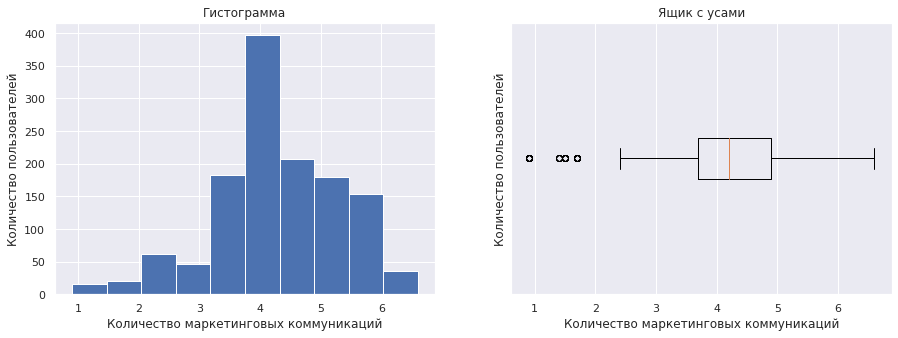

In [53]:
show_numeric_bplt_hist(market_file, 'маркет_актив_6_мес',\
                       'Количество маркетинговых коммуникаций', 'Количество пользователей', 10)

Распределение маркетинговой активности за последние полгода похоже на нормальное, со сдвигом в большую сторону.

#### Признак ``маркет_актив_тек_мес`` (количественный, с дискретным характером)

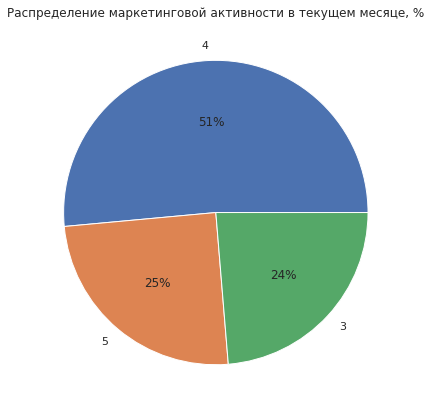

In [54]:
show_category_pie(market_file, 'маркет_актив_тек_мес', 'Распределение маркетинговой активности в текущем месяце')

В текущем месяце с пользователями коммуницировали преимущественно 4 раза, в целом от 3 до 5 раз.

#### Признак ``покупательская_активность`` (категориальный)

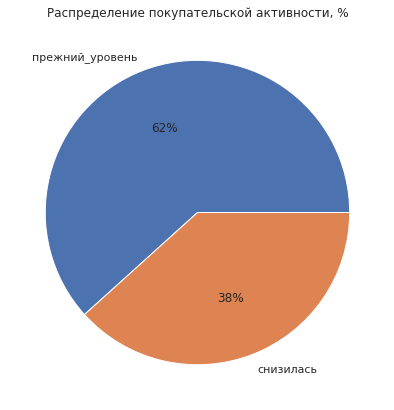

In [55]:
show_category_pie(market_file, 'покупательская_активность', 'Распределение покупательской активности')

На диаграмме виден дисбалланс классов, необходима обработка. Активность большинства пользователей осталась на прежнем уровне, но число снизивших активность - значительно!

#### Признак ``тип_сервиса`` (категориальный)

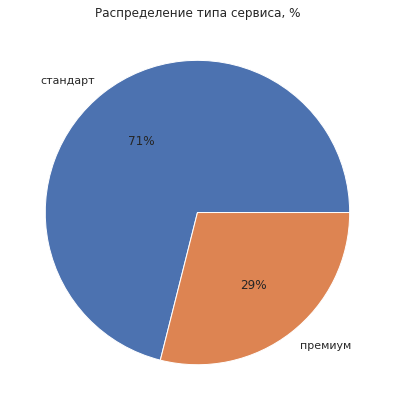

In [56]:
show_category_pie(market_file, 'тип_сервиса', 'Распределение типа сервиса')

Пользователей "стандарт" более чем в два раза больше, чем "премиум". Выглядит достоверно.

#### Признак ``разрешить_сообщать`` (категориальный)

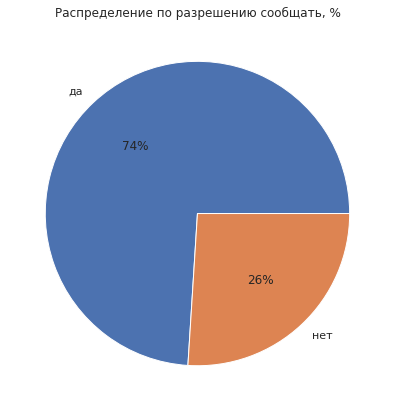

In [57]:
show_category_pie(market_file, 'разрешить_сообщать', 'Распределение по разрешению сообщать')

Примерно 3/4 пользователей согласны на рассылку. Возможно это связано с тем, что рассылка действительно полезна и работает.

#### Признак ``акционные_покупки`` (количественный)

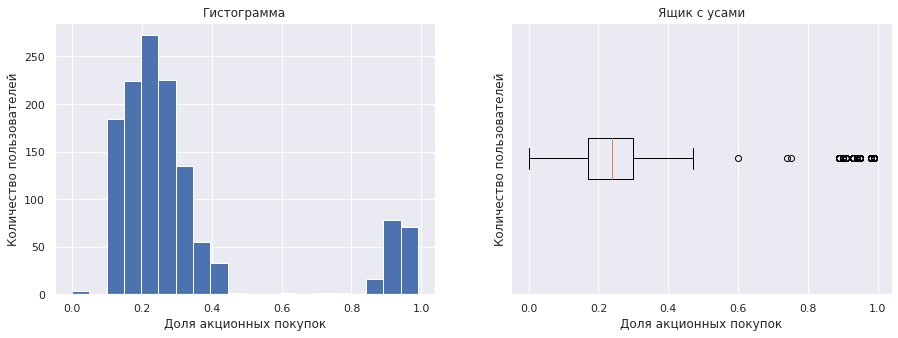

In [58]:
show_numeric_bplt_hist(market_file, 'акционные_покупки',\
                       'Доля акционных покупок', 'Количество пользователей', 20)

На гистограмме видно, что существует группа пользователей, которые предпочитают акционные покупки. Вне акции такие пользователи почти не совершают покупки.

#### Признак ``длительность`` (количественный). Распределение по дням с момента регистрации пользователя.

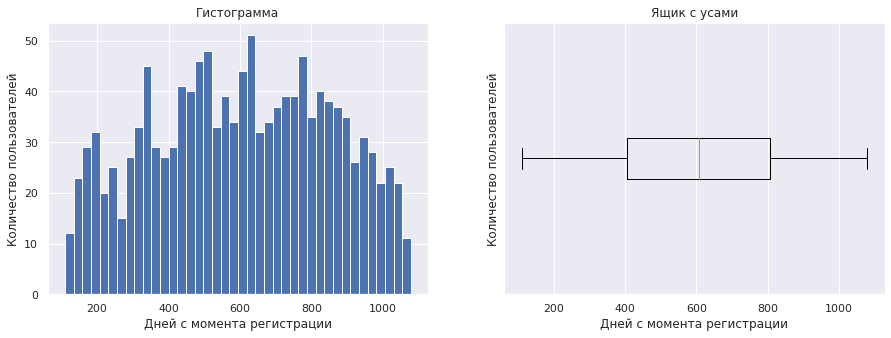

In [59]:
show_numeric_bplt_hist(market_file, 'длительность',\
                       'Дней с момента регистрации', 'Количество пользователей', 40)

Магазин открыт уже более трёх лет, распределение стремится к равномерному. Можно увидеть 4 пика с определённым ритмом, возможно это связано с одной из периодических акций магазина по привлечению новых пользователей.

#### Признак ``популярная_категория`` (категориальный)

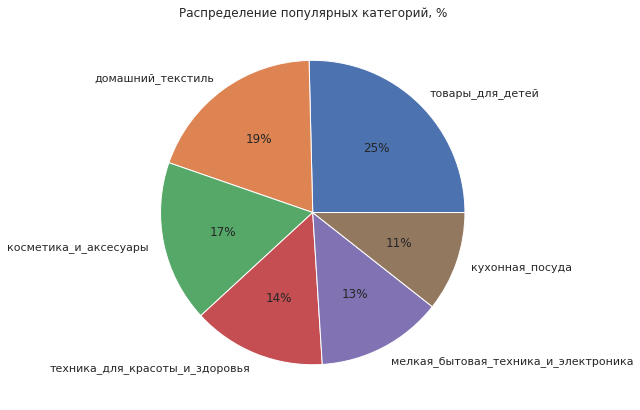

In [60]:
show_category_pie(market_file, 'популярная_категория', 'Распределение популярных категорий')

Самым **большим спросом** пользуется категория **"товары для детей"**, далее идут "домашний текстиль", "косметика и аксессуары", "техника для красоты и здоровья", "мелкая бытовая техника" и **на последнем** месте **"кухонная посуда"**.

#### Признак ``средний_просмотр_категорий_за_визит`` (количественный, с дискретным характером)

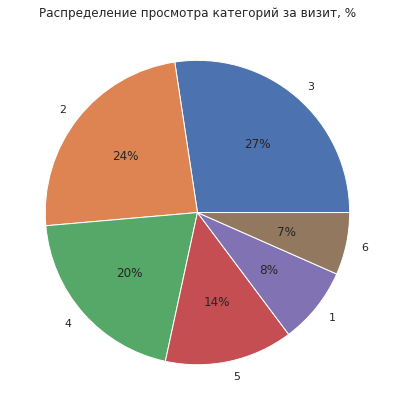

In [61]:
show_category_pie(market_file, 'средний_просмотр_категорий_за_визит', 'Распределение просмотра категорий за визит')

В среднем просматривают от 2х до 4х категории за посещение магазина.

#### Признак ``неоплаченные_продукты_штук_квартал`` (количественный, с дискретным характером)

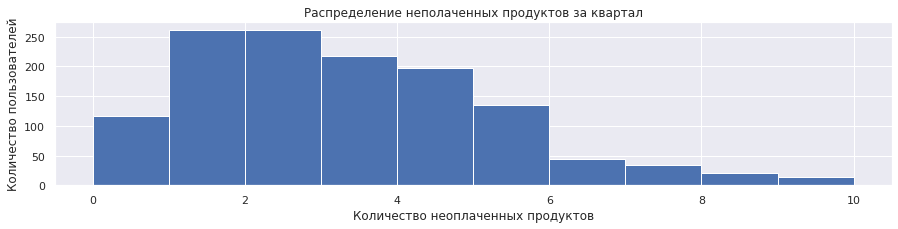

In [62]:
market_file['неоплаченные_продукты_штук_квартал'].hist(figsize=(15, 3), bins=10)
plt.title('Распределение неполаченных продуктов за квартал')
plt.xlabel('Количество неоплаченных продуктов')
plt.ylabel('Количество пользователей');

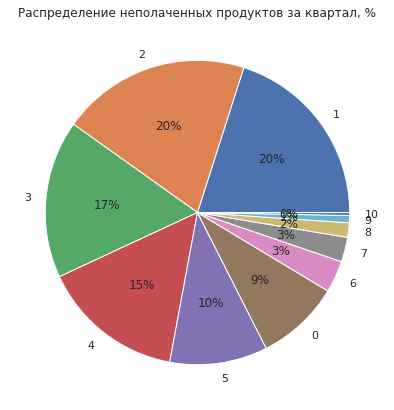

In [63]:
show_category_pie(market_file, 'неоплаченные_продукты_штук_квартал', 'Распределение неполаченных продуктов за квартал')

Небольшое количество продуктов не оплачивается пользователями чаще.

#### Признак ``ошибка_сервиса`` (количественный, с дискретным характером)

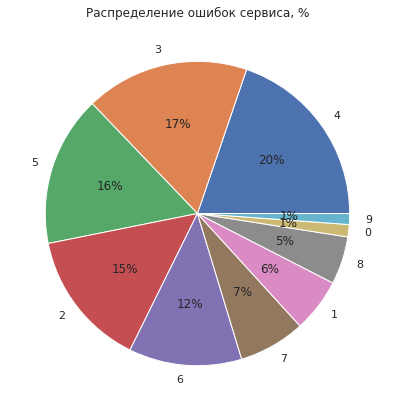

In [64]:
show_category_pie(market_file, 'ошибка_сервиса', 'Распределение ошибок сервиса')

In [65]:
market_file['ошибка_сервиса'].describe()

count   1300.000000
mean       4.185385
std        1.955298
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max        9.000000
Name: ошибка_сервиса, dtype: float64

Чаще всего пользователи сталкивались с 4-мя ошибками, в целом от 3 до 6 ошибок. Так или иначе с ошибками сталкивались почти все пользователи, лишь менее процента не сталкивались. Поскольку нет данных по критериям логирования ошибок - можно лишь рекомендовать техническому отделу компании обратить на это внимание.

#### Признак ``страниц_за_визит`` (количественный). Распределение количества страниц за визит.

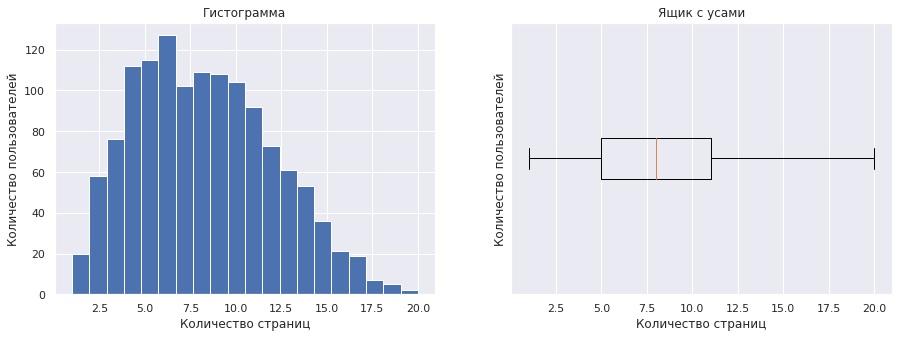

In [66]:
show_numeric_bplt_hist(market_file, 'страниц_за_визит',\
                       'Количество страниц', 'Количество пользователей', 20)

За визит пользователи смотрят до 20 страниц, чаще - 6.

**Вывод:**
- Распределение маркетинговой активности за последние полгода похоже на нормальное, со сдвигом в большую сторону;
- В текущем месяце с пользователями коммуницировали преимущественно 4 раза, в целом от 3 до 5 раз;
- Активность большинства пользователей осталась на прежнем уровне, но число снизивших активность - значительно!
- Пользователей "стандарт" более чем в два раза больше, чем "премиум". Выглядит достоверно;
- Примерно 3/4 пользователей согласны на рассылку. Возможно это связано с тем, что рассылка действительно полезна и работает, либо пользователи фильтруют входящие сообщения от магазина;
- Существует группа пользователей, которые предпочитают акционные покупки. Вне акции такие пользователи почти не совершают покупки;
- Магазин открыт уже более трёх лет, распределение стремится к равномерному. Можно увидеть 4 пика с определённым ритмом, возможно это связано с одной из периодических акций магазина по привлечению новых пользователей;
- Самым большим спросом пользуется категория "товары для детей", далее идут "домашний текстиль", "косметика и аксессуары", "техника для красоты и здоровья", "мелкая бытовая техника" и на последнем месте "кухонная посуда";
- Распределение просмотра категорий за визит - близко к нормальному. В среднем просматривают 3 категории за посещение магазина;
- Небольшое количество продуктов не оплачивается пользователями чаще;
- Распределение ошибок сервиса нормальное, чаще всего пользователи сталкивались с 5-ю ошибками. Так или иначе с ошибками сталкивались почти все пользователи. Поскольку нет данных по критериям логирования ошибок - можно лишь рекомендовать техническому отделу компании обратить на это внимание;
- За визит пользователи смотрят до 20 страниц, чаще - 6.

### Датасет <span style="color: blue">market_money</span>.

In [67]:
# цвета для диаграмм
pre_pre_month_color = 'gray'
pre_month_color = '#3672b4'
month_color = '#ac0936'

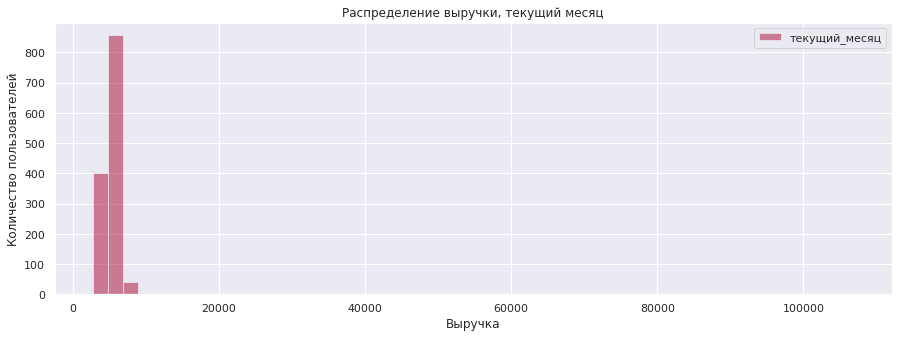

In [68]:
bins = 50
plt.subplots(figsize=(15, 5))
plt.hist(market_money.query('период == "текущий_месяц"')['выручка'],\
         alpha=0.5, label='текущий_месяц', bins = bins, color=month_color)
plt.xlabel('Выручка')
plt.ylabel('Количество пользователей')
plt.title('Распределение выручки, текущий месяц')
plt.legend()
plt.show()

Явно присутствуют выбросы. Проверим сколько таких записей.

In [69]:
out_item = market_money[market_money['выручка'] > 10000]
out_item

,id,период,выручка
98,215380,текущий_месяц,106862.200000


Сумма затрат пользователя 215380 в текущем месяце в 10 раз превышает сумму затрат любого другого польователя. Такое технически возможно, но для ML исключим эту запись из датасета.

In [70]:
market_money = market_money[market_money['выручка'] <= 10000]

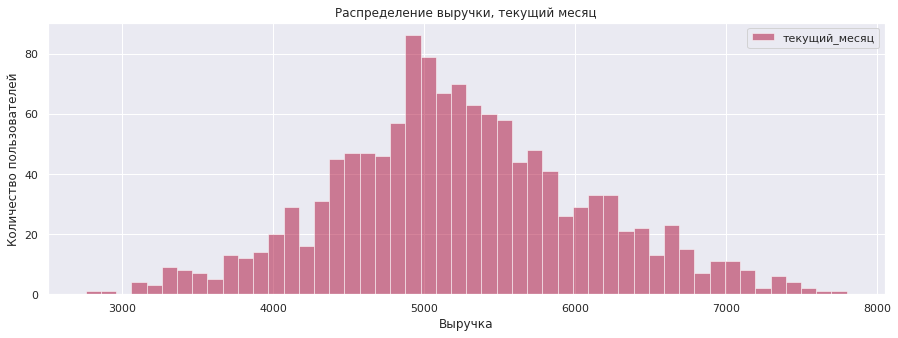

In [71]:
bins = 50
plt.subplots(figsize=(15, 5))
plt.hist(market_money.query('период == "текущий_месяц"')['выручка'],\
         alpha=0.5, label='текущий_месяц', bins = bins, color=month_color)
plt.xlabel('Выручка')
plt.ylabel('Количество пользователей')
plt.title('Распределение выручки, текущий месяц')
plt.legend()
plt.show()

In [72]:
market_money.shape

(3899, 3)

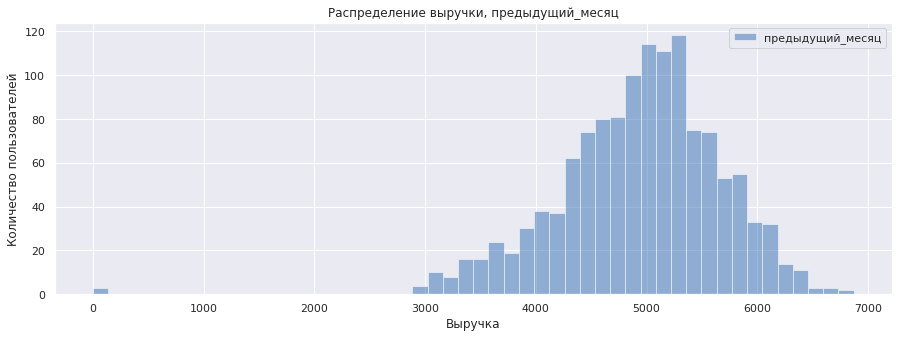

In [73]:
bins = 50
plt.subplots(figsize=(15, 5))

plt.hist(market_money.query('период == "предыдущий_месяц"')['выручка'],\
         alpha=0.5, label='предыдущий_месяц', bins = bins, color=pre_month_color)
plt.xlabel('Выручка')
plt.ylabel('Количество пользователей')
plt.title('Распределение выручки, предыдущий_месяц')
plt.legend()
plt.show()

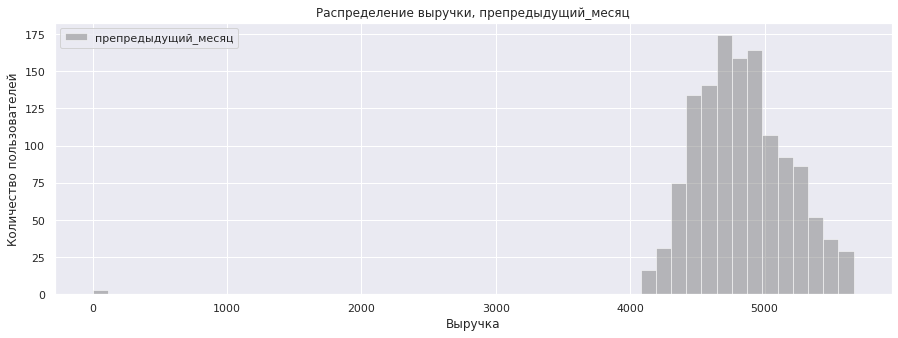

In [74]:
bins = 50
plt.subplots(figsize=(15, 5))

plt.hist(market_money.query('период == "препредыдущий_месяц"')['выручка'],\
         alpha=0.5, label='препредыдущий_месяц', bins = bins, color=pre_pre_month_color)
plt.xlabel('Выручка')
plt.ylabel('Количество пользователей')
plt.title('Распределение выручки, препредыдущий_месяц')
plt.legend()
plt.show()

Судя по графикам в "выручке" всё ещё есть выбросы. Проверим все записи с выручкой менее 2000.

In [75]:
out_items = market_money[market_money['выручка'] < 2000]
out_items

,id,период,выручка
0,215348,препредыдущий_месяц,0.000000
2,215348,предыдущий_месяц,0.000000
28,215357,препредыдущий_месяц,0.000000
29,215357,предыдущий_месяц,0.000000
34,215359,предыдущий_месяц,0.000000
35,215359,препредыдущий_месяц,0.000000


Для трёх пользователей с id: 215348, 215357, 215359 - есть записи в которых _не зафиксирована выручка_. Поскольку в датасете фиксируется выручка пользователей, то предположу, что если есть запись, то выручка должна быть больше 0. Вероятно записи с нулевой выручкой - ошибка в данных. Можно ещё предположить, что в конкретном периоде у пользователя были покупки, но был оформлен возврат, тогда в датасете могли появиться записи с 0 в колонке "выручка". <span style="color: darkgreen">Поскольку в задании указано убирать неактивных пользователей, исключим их из датасета.</span>

In [76]:
market_money = market_money[market_money['выручка'] > 0]

In [77]:
market_money.shape

(3893, 3)

In [78]:
market_money['выручка'].min()

2758.7

Минимальная выручка 2758.7 руб.

In [79]:
market_money['выручка'].max()

7799.4

Максимальная выручка 7799.4 руб.

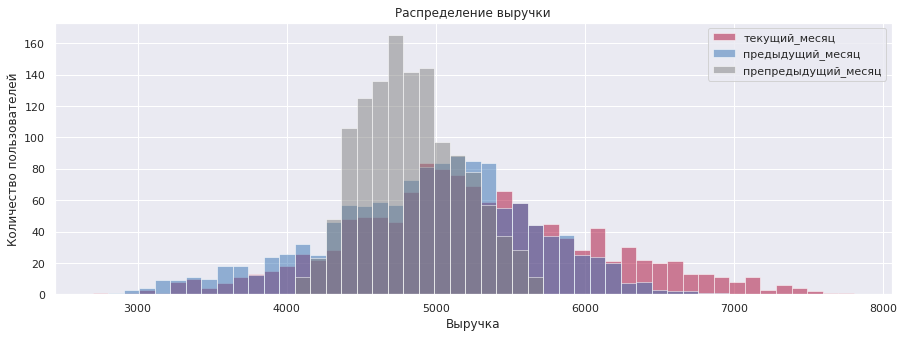

In [80]:
bins = np.linspace(2700, 7800) # от 2000 до 8000
plt.subplots(figsize=(15, 5))

plt.hist(market_money.query('период == "текущий_месяц"')['выручка'],\
         alpha=0.5, label='текущий_месяц', bins = bins, color=month_color)
plt.hist(market_money.query('период == "предыдущий_месяц"')['выручка'],\
         alpha=0.5, label='предыдущий_месяц', bins = bins, color=pre_month_color)
plt.hist(market_money.query('период == "препредыдущий_месяц"')['выручка'],\
         alpha=0.5, label='препредыдущий_месяц', bins = bins, color=pre_pre_month_color)
plt.xlabel('Выручка')
plt.ylabel('Количество пользователей')
plt.title('Распределение выручки')
plt.legend()
plt.show()

**Вывод:**
- В данных присутствуют выбросы, которые устанены

В целом диаграмма выручки по всем периодам стремится к нормальной. 
- В ``предпредыдущем месяце`` выручка была в диапазоне от 4100 до 5900 руб., с пиком примерно на 4800 руб. Основная масса пользователей принесла выручку от 4400 до 5000 руб. в этом периоде. На диаграмме виден сдвиг влево.
- В ``предыдущем месяце`` диапазон выручки увеличился, граница наименьшей выручки стала примерно 2900 руб, наибольшей 6800 руб. Пик - примерно на 5000 руб, именно такую выручку принесло больше всего пользователей. Распределение стремится к нормальному.
- В ``текущем месяце`` диапазон ещё больше увеличился. Наименьшая выручка как и у предыдущего с 2900 руб., а наибольшая стала примерно 7800 руб. Пик - примерно на 5000, как у предыдущего. Распределение стремится к нормальному.

### Датасет <span style="color: blue">market_time</span>.

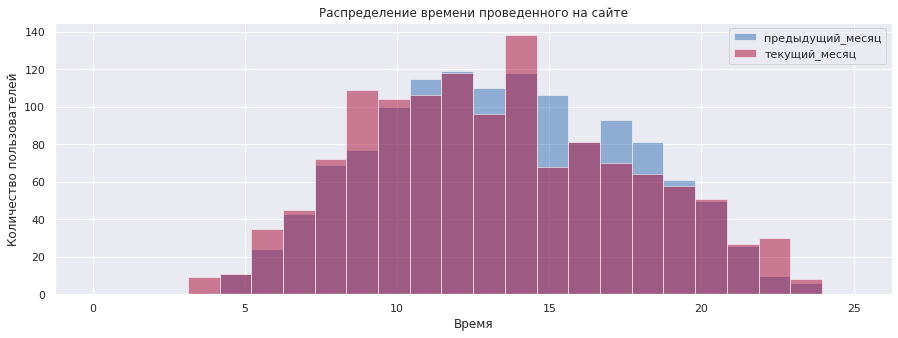

In [81]:
bins = np.linspace(0, 25, 25) # от 2000 до 8000
plt.subplots(figsize=(15, 5))
plt.hist(market_time.query('период == "предыдущий_месяц"')['минут'],\
         alpha=0.5, label='предыдущий_месяц', bins = bins, color=pre_month_color)
plt.hist(market_time.query('период == "текущий_месяц"')['минут'],\
         alpha=0.5, label='текущий_месяц', bins = bins, color=month_color)
plt.xlabel('Время')
plt.ylabel('Количество пользователей')
plt.title('Распределение времени проведенного на сайте')
plt.legend()
plt.show()

На графике видно, что пользователи стали немного меньше проводить времени на сайте в сравнении с прошлым месяцем. Проверим это:

In [82]:
month_current = market_time.query('период == "текущий_месяц"')['минут'].mean()
month_pre = market_time.query('период == "предыдущий_месяц"')['минут'].mean()
month_current - month_pre

-0.2630769230769232

Действительно в среднем меньше на 0.26 мин.

**Вывод:**
- пользователи стали немного меньше проводить времени на сайте в сравнении с прошлым месяцем;
- в среднем на 0.26 мин.

### Датасет <span style="color: blue">money</span>.

In [83]:
money['прибыль'].describe()

count   1300.000000
mean       3.996631
std        1.013722
min        0.860000
25%        3.300000
50%        4.045000
75%        4.670000
max        7.430000
Name: прибыль, dtype: float64

Выручка и прибыль явно имеют разные единицы измерения. Выручка в рублях, прибыль в тысячах рублей. Приведём значения к рублям.

In [84]:
money['прибыль'] = money['прибыль'].apply(lambda x: x * 1000)

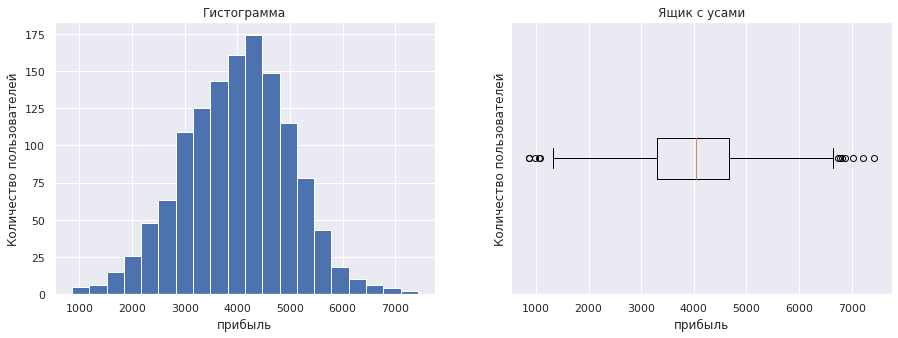

In [85]:
show_numeric_bplt_hist(money, 'прибыль',\
                       'прибыль', 'Количество пользователей', 20)

Распределение стремится к нормальному, немного сдвинуто вправо, пик на 5000 руб. В целом график похож на "выручку".

**Вывод:**
- выручка и прибыль имеют разные единицы измерения. Привели значения к рублям
- распределение стремится к нормальному, немного сдвинуто вправо, пик на 5000 руб. В целом график похож на "выручку".

## Объединение таблиц

Для объединения таблиц необходимо их подготовить.

### Подготовка таблицы на основе ``market_money``

Для таблицы на основе датасета market_money подготовим новые колонки ``выручка_пред``, ``выручка_предпред``, ``выручка_текущий``. Удалим пользователей, которые не были активны в один из периодов.

In [86]:
market_money_table = market_money.pivot_table(index='id', columns='период', values='выручка', aggfunc='sum')\
    .rename(columns={'предыдущий_месяц': 'выручка_пред',\
                     'препредыдущий_месяц': 'выручка_препред',\
                     'текущий_месяц': 'выручка_текущий'})\
    .dropna().reset_index() # dropna() удаление неактивных пользователей
market_money_table.head(3)

период,id,выручка_пред,выручка_препред,выручка_текущий
0,215349,5216.000000,4472.000000,4971.600000
1,215350,5457.500000,4826.000000,5058.400000
2,215351,6158.000000,4793.000000,6610.400000


### Подготовка таблицы на основе ``market_time``

Для таблицы на основе датасета market_time подготовим новые колонки ``минут_пред``, ``минут_текущий``.

In [87]:
market_time_table = market_time.pivot_table(index='id', columns='период', values='минут', aggfunc='sum')\
    .fillna(0).rename(columns={'предыдущий_месяц': 'минут_пред','текущий_месяц': 'минут_тек'}).reset_index()
market_time_table.head(3)

период,id,минут_пред,минут_тек
0,215348,13,14
1,215349,12,10
2,215350,8,13


### Объединение c ``market_file``

In [88]:
combined_dataset = market_file\
    .merge(market_money_table, how='inner',left_on='id', right_on='id')\
    .merge(market_time_table, how='inner', left_on='id', right_on='id')\
    .merge(money, how='inner', left_on='id', right_on='id')
combined_dataset.head(3)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_текущий,минут_пред,минут_тек,прибыль
0,215349,снизилась,премиум,да,4.400000,4,819,0.750000,товары_для_детей,4,4,2,5,5216.000000,4472.000000,4971.600000,12,10,4160.000000
1,215350,снизилась,стандарт,нет,4.900000,3,539,0.140000,домашний_текстиль,5,2,1,5,5457.500000,4826.000000,5058.400000,8,13,3130.000000
2,215351,снизилась,стандарт,да,3.200000,5,896,0.990000,товары_для_детей,5,0,6,4,6158.000000,4793.000000,6610.400000,11,13,4870.000000


In [89]:
combined_dataset.shape

(1296, 19)

Данные объединены.

## Корреляционный анализ

Закодируем целевую переменную.

In [90]:
combined_dataset['покупательская_активность'] = (combined_dataset['покупательская_активность'] == 'снизилась' * 1)
combined_dataset = combined_dataset.rename(columns={'покупательская_активность': 'снизилась'})

combined_dataset.head(3)

,id,снизилась,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_текущий,минут_пред,минут_тек,прибыль
0,215349,True,премиум,да,4.400000,4,819,0.750000,товары_для_детей,4,4,2,5,5216.000000,4472.000000,4971.600000,12,10,4160.000000
1,215350,True,стандарт,нет,4.900000,3,539,0.140000,домашний_текстиль,5,2,1,5,5457.500000,4826.000000,5058.400000,8,13,3130.000000
2,215351,True,стандарт,да,3.200000,5,896,0.990000,товары_для_детей,5,0,6,4,6158.000000,4793.000000,6610.400000,11,13,4870.000000


Проверим корреляцию признаков на heatmap

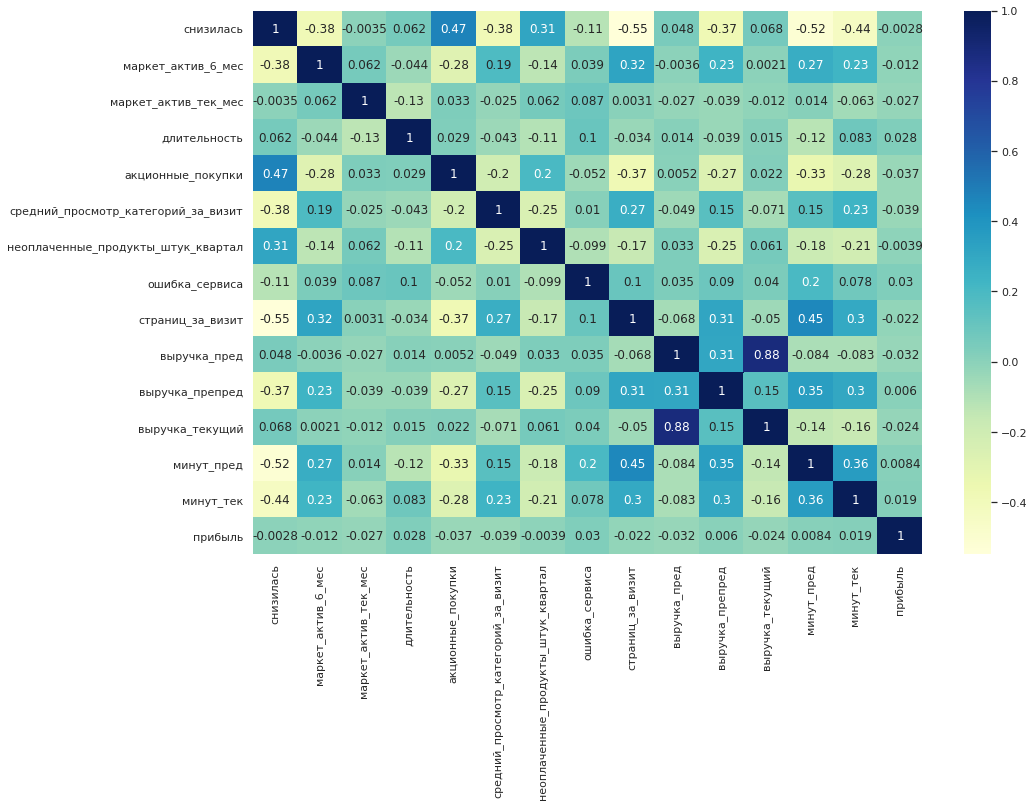

In [92]:
sns.heatmap(combined_dataset.drop('id', axis=1).corr(method='spearman'), cmap="YlGnBu", annot=True);

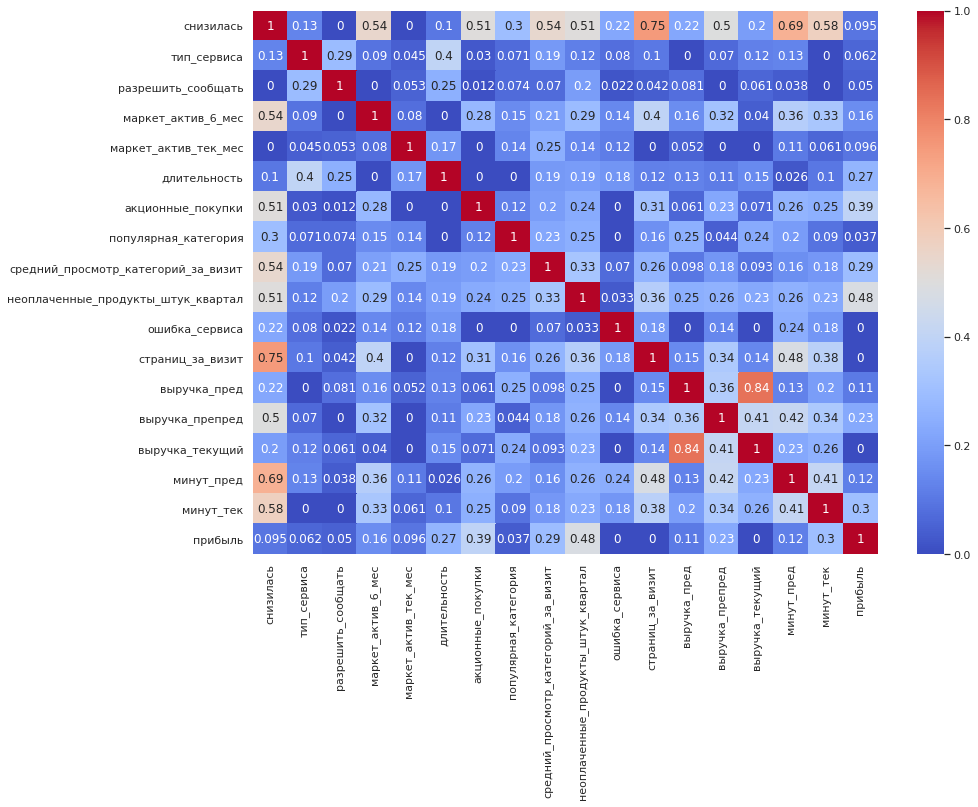

In [94]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    combined_dataset.drop(["id"],axis=1).phik_matrix(
        interval_cols=['маркет_актив_6_мес',
                       'маркет_актив_тек_мес',
                       'длительность', 
                       'акционные_покупки', 
                       'средний_просмотр_категорий_за_визит', 
                       'неоплаченные_продукты_штук_квартал', 
                       'ошибка_сервиса', 
                       'страниц_за_визит',
                       'выручка_текущий',
                       'выручка_пред',
                       'выручка_препред',
                       'минут_тек',
                       'минут_пред'
                      ]
    ), 
    annot=True, 
    cmap='coolwarm'
)
plt.show()

В целом карта phik очень похожа на исходную heatmap. Самое значительное отличие - связь ``выручка_пред`` и ``выручка_текущий`` - 0.84. Порог 0.9 - не переходит ни один признак.

## Выбор лучшей модели

Выполним разбивку на выборки.

In [97]:
X = combined_dataset.drop(['id', 'снизилась'], axis=1)
y = combined_dataset['снизилась']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

In [98]:
X_train

,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_текущий,минут_пред,минут_тек,прибыль
506,стандарт,да,5.500000,4,510,0.150000,мелкая_бытовая_техника_и_электроника,2,4,7,16,5170.500000,4347.000000,6014.200000,20,6,4370.000000
10,стандарт,да,5.100000,4,199,0.230000,техника_для_красоты_и_здоровья,4,5,2,3,6400.000000,4597.000000,3789.700000,11,13,4030.000000
532,стандарт,да,4.300000,5,997,0.170000,мелкая_бытовая_техника_и_электроника,5,1,3,11,4113.000000,4626.000000,3798.400000,13,10,4370.000000
1212,стандарт,да,5.600000,4,342,0.940000,кухонная_посуда,2,7,5,8,4930.000000,5269.000000,4766.200000,14,19,5580.000000
363,премиум,да,3.600000,5,873,0.390000,товары_для_детей,3,2,2,5,3716.000000,4691.000000,4600.000000,10,10,4870.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,стандарт,да,4.000000,3,432,0.160000,косметика_и_аксесуары,4,1,2,13,5646.500000,4685.000000,6609.800000,17,22,3950.000000
825,стандарт,да,3.500000,4,666,0.210000,мелкая_бытовая_техника_и_электроника,2,2,2,8,4667.000000,5132.000000,4394.000000,21,18,4120.000000
583,стандарт,да,5.300000,4,352,0.130000,товары_для_детей,1,7,3,10,5371.500000,5274.000000,5586.000000,15,19,3850.000000
511,стандарт,нет,4.600000,4,900,0.160000,мелкая_бытовая_техника_и_электроника,5,0,8,8,4862.000000,4985.000000,4885.400000,18,20,4420.000000


In [99]:
y_train

506     False
10       True
532     False
1212    False
363      True
        ...  
805     False
825     False
583      True
511     False
678     False
Name: снизилась, Length: 972, dtype: bool

### Cоздание пайплайна обработки признаков

In [100]:
# разбор по типу данных в столбцах
cat_columns = X_train.select_dtypes('object').columns # категориальные
num_columns = X_train.select_dtypes('float').columns # количественные

# пайп для категориальных (как в тренажёре)
cat_processor = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent') # SimpleImputer
        ),
        (
            'encoder', 
            OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)), # OrdinalEncoder
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent') # SimpleImputer
        )
    ]
)

data_preprocessor = ColumnTransformer(
    [
        (
            'cat', 
            cat_processor, # пайп для категориальных
            cat_columns
        ),
        (
            'num', 
            StandardScaler(), # скейлер
            num_columns
        ),
    ]
) 

In [101]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
) 

Проверяем пайп на модели

In [102]:
# обучаем модель на тренировочной выборке
pipe_final.fit(X_train, y_train)

y_test_pred = pipe_final.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred[:, 1])}') 

Метрика ROC-AUC на тестовой выборке: 0.7123528697973548


### Cоздание пайплайна выбора лучшей модели

#### Подготовка параметров для моделей

In [103]:
# Параметры для LogisticRegression
logreg_params = {}

logreg_params['preprocessor__cat__encoder'] = [OneHotEncoder(drop='first', 
                                                             sparse=False)]
logreg_params['preprocessor__num'] = [StandardScaler(), 
                                      MinMaxScaler(), 
                                      RobustScaler()]

logreg_params['models__C'] = range(1, 5)
logreg_params['models__penalty'] = ['l2', 'l1']
logreg_params['models'] = [LogisticRegression(random_state=RANDOM_STATE,
                                                  solver='liblinear',
                                                  max_iter=1000)]


# Параметры для KNeighborsClassifier
knn_params = {}

knn_params['preprocessor__cat'] = [OneHotEncoder(drop='first')]
knn_params['preprocessor__num'] = [StandardScaler(), 
                                   MinMaxScaler(), 
                                   RobustScaler()]

knn_params['models__n_neighbors'] = [2, 5, 10, 25, 50]
knn_params['models'] = [KNeighborsClassifier()]

# Параметры для DecisionTreeClassifier
tree_params = {}

tree_params['preprocessor__cat__encoder'] = [OrdinalEncoder(), 
                                             OneHotEncoder(drop='first')]
tree_params['preprocessor__num'] = [StandardScaler(), 
                                    MinMaxScaler(), 
                                    RobustScaler()]

tree_params['models__max_depth'] = range(2, 11)
tree_params['models__min_samples_leaf'] = range(2, 10)
tree_params['models__min_samples_split'] = range(2, 10)
tree_params['models'] = [DecisionTreeClassifier(random_state=RANDOM_STATE)]

# Параметры для SVC
#svc_params = {}

#svc_params['preprocessor__cat__encoder'] = [OrdinalEncoder(),
#                                            OneHotEncoder(drop='first')]
#svc_params['preprocessor__num'] = [StandardScaler(), 
#                                   MinMaxScaler(), 
#                                   RobustScaler()]

#svc_params['models__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
#svc_params['models'] = [SVC(probability=True,
#                                random_state=RANDOM_STATE)]

#params = [logreg_params, knn_params, tree_params, svc_params]
params = [logreg_params, knn_params, tree_params]

#### Поиск лучшей модели

In [104]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    params, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [105]:
%%time
randomized_search.fit(X_train, y_train)

CPU times: user 1.76 s, sys: 0 ns, total: 1.76 s
Wall time: 1.76 s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encoder',
                                                                                                OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                               unknown_value=nan)),
                                                                                               ('simpleImputer_after_ord',
                                                        

In [106]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_) 

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder()),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  Index(['тип_сервиса', 'разрешить_сообщать', 'популярная_категория'], dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['маркет_актив_6_мес', 'акционные_пок

In [107]:
print('Метрика ROC-AUC для лучшей модели:\n', randomized_search.best_score_) 

Метрика ROC-AUC для лучшей модели:
 0.8469878092969003


In [108]:
y_pred = randomized_search.best_estimator_.predict_proba(X_test)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_pred[:, 1])}')

Метрика ROC-AUC на тестовой выборке: 0.8811430651619949


Подбор проводился на RandomizedSearchCV, поскольку GridSearchCV требует ~~минимум 5 минут~~ 7min 48s на обучение. Код GridSearch закомментирован ниже.

**Вывод:**

- оптимальная метрика ROC-AUC. Она отлично подходит для бинарной классификации с несбалансированной выборкой. 

**На RandomizedSearch получены следующие результаты:**
- Лучшая модель и её параметры(сокращённо): SVC(C=1, probability=True, random_state=42))

- Метрика ROC-AUC для лучшей модели: 0.8667589903953539
- Метрика ROC-AUC на тестовой выборке: 0.8382459677419355

**На GridSearch получены следующие результаты:**
- Лучшая модель и её параметры(сокращённо): SVC(C=1, probability=True, random_state=42))

- Метрика ROC-AUC для лучшей модели: 0.8723868289777382
- Метрика ROC-AUC на тестовой выборке: 0.8593548387096774

In [109]:
#grid_search = GridSearchCV(
#    pipe_final,
#    param_grid=params,
#    cv=5,
#    scoring='roc_auc')

In [110]:
#%%time
#grid_search.fit(X_train, y_train)

In [111]:
#print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_) 

In [112]:
#print('Метрика ROC-AUC для лучшей модели:\n', grid_search.best_score_) 

In [113]:
#y_pred = grid_search.best_estimator_.predict_proba(X_test)
#print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_pred[:, 1])}') 

## Анализ важности признаков (отбор признаков)

Обучим лучшую модель, используем shap для выделения значимых признаков

In [114]:
# лучшая модель по результатам поиска
best_estimator = randomized_search.best_estimator_
linear_model = best_estimator.named_steps['models'] # для shap

# обучаем
X_train_prep = best_estimator.named_steps['preprocessor'].fit_transform(X_train)
X_test_prep = best_estimator.named_steps['preprocessor'].transform(X_test)

# используем shap
explainer = shap.Explainer(linear_model.predict_proba, X_train_prep)
shap_values = explainer(X_test_prep)

In [115]:
# построим график общей значимости признаков
shap.summary_plot(shap_values[:, :, 1],\
                  X_test_prep,\
                  plot_type="bar",\
                  feature_names=(cat_columns.tolist() + num_columns.tolist()))

**Вывод:**

Судя по диаграмме на активность покупателей больше всего влияют "акционные покупки". Акции - проверненый механизм для увеличения активности. Далее идут "выручка в предыдущих месяцах" и "интенсивность коммуникации". Если пользователь что-то приобретал в предыдущие месяцы, велика вероятность, что он придёт ещё раз. Взаимодействие с пользователями, который дали на это разрешение, так же способствует росту активности.

## Сегментация покупателей

### По важности признаков

Основываясь на выводах по анализу важности признаков, отберём пользователей. Принцип отбора: 
- пользователи, у которых доля покупок по акции хотя бы треть;
- пользователи, которые принесли выручку более медианы;
- пользователи, с которыми была связь в полугодие.

In [116]:
users_by_importance = X[(X['акционные_покупки'] > 0.3) &\
               (X['выручка_препред'] > X['выручка_препред'].median()) &\
               (X['маркет_актив_6_мес'] > X['маркет_актив_6_мес'].median())]

In [117]:
users_by_importance.shape

(40, 17)

40 пользователей отвечают критериям

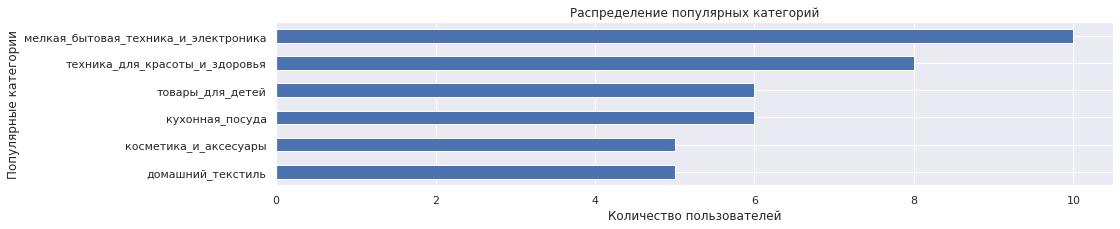

In [118]:
users_by_importance['популярная_категория'].value_counts().sort_values().plot.barh(figsize=(15, 3))
plt.title('Распределение популярных категорий')
plt.xlabel('Количество пользователей')
plt.ylabel('Популярные категории');

У выбранной группы наиболее полпулярна категория "мелкая бытовая техника и электроника"

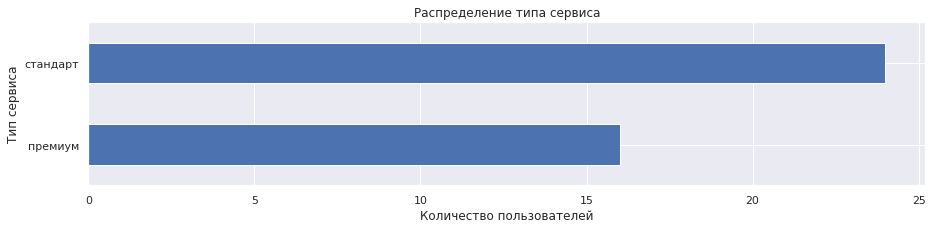

In [119]:
users_by_importance['тип_сервиса'].value_counts().sort_values().plot.barh(figsize=(15, 3))
plt.title('Распределение типа сервиса')
plt.xlabel('Количество пользователей')
plt.ylabel('Тип сервиса');

**Сегментация - по важности признаков:**

В группе преобладают покупатели без подписки. Можно рекомендовать заказчику склонить пользователей к подписке и переходу в статус "премиум". Например, через бесплатный период пользования подпиской для теста её пользы. На самые популярные категории товаров делать скидки и акции при наличии подписки. Кроме того, в подписку с разрешения пользователей добавить "премиум" рассылку - "только для своих".

Имея информацию о том, что активны те, кто тратит больше, можно предложить таким пользователям свою систему скидок. Использовать маркетинговые рычаги для поощрения.

### По вероятности снижения покупательской активности

In [120]:
# добавил столбец "вероятность_снижения"
y_decline_pred = best_estimator.predict_proba(combined_dataset.drop(['id','снизилась'], axis=1))[:, 1]
combined_dataset['вероятность_снижения'] = pd.DataFrame(y_decline_pred, columns=["вероятность_снижения"])
combined_dataset.head(3)

,id,снизилась,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_текущий,минут_пред,минут_тек,прибыль,вероятность_снижения
0,215349,True,премиум,да,4.400000,4,819,0.750000,товары_для_детей,4,4,2,5,5216.000000,4472.000000,4971.600000,12,10,4160.000000,0.927555
1,215350,True,стандарт,нет,4.900000,3,539,0.140000,домашний_текстиль,5,2,1,5,5457.500000,4826.000000,5058.400000,8,13,3130.000000,0.350217
2,215351,True,стандарт,да,3.200000,5,896,0.990000,товары_для_детей,5,0,6,4,6158.000000,4793.000000,6610.400000,11,13,4870.000000,0.941470


In [121]:
combined_dataset.shape

(1296, 20)

#### Сегментация покупателей с учетом прибыли и вероятности снижения покупательской активности

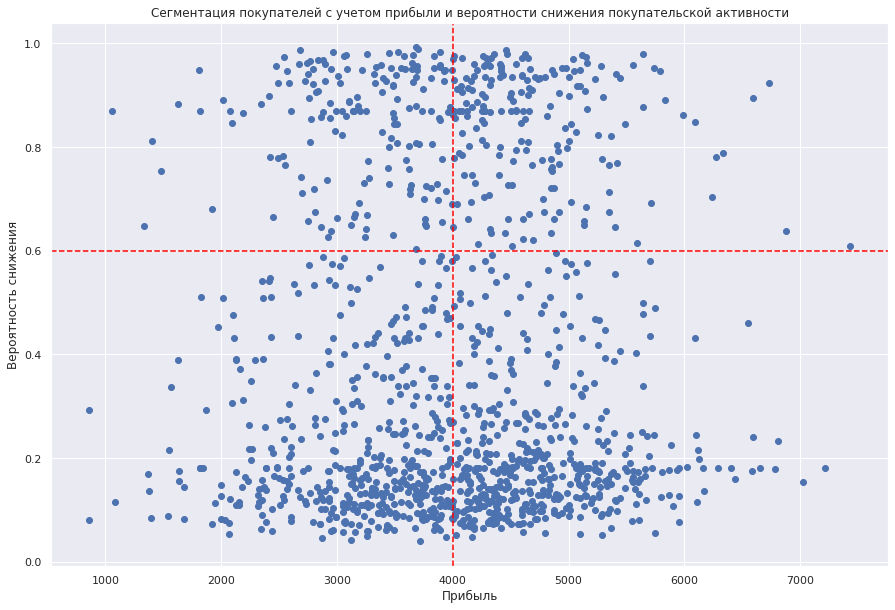

In [122]:
plt.scatter(combined_dataset['прибыль'], combined_dataset['вероятность_снижения'])

plt.title('Сегментация покупателей с учетом прибыли и вероятности снижения покупательской активности')
plt.xlabel("Прибыль")
plt.ylabel("Вероятность снижения")
plt.axvline(x=4000, color='red',linestyle='--')
plt.axhline(y=0.6, color='red',linestyle='--')
plt.show()

По соотношению вероятности снижения покупательской активности к прибыли можно выделить 4 сегмента (группы клиентов):

- с низкой прибылью и высокой вероятностью снижения покупательской активности;
- с низкой прибылью и низкой вероятностью снижения покупательской активности.

- **``с высокой прибылью и высокой вероятностью снижения покупательской активности;``**
- с высокой прибылью и низкой вероятностью снижения покупательской активности;

Клиенты с ``с высокой прибылью и высокой вероятностью снижения покупательской активности`` для бизнеса наиболее интересены. Было бы полезно исследовать пути предотвращения снижения покупательской активности в для этой группы.

#### Подготовка данных для анализа

In [123]:
# добавим поля для аналитики: 
# "выручка_среднее", "минут_динамика", "маркет_динамика", "уровень_акционных_покупок", "средняя_выручка_со_страницы"
combined_dataset['выручка_среднее'] = (combined_dataset['выручка_текущий'] + combined_dataset['выручка_пред']\
                                       + combined_dataset['выручка_препред']) / 3

combined_dataset['минут_динамика'] = np.where((combined_dataset['минут_тек']\
                                               - combined_dataset['минут_пред']) > 0, "увеличилось", "снизилось")

combined_dataset['маркет_динамика'] = np.where((combined_dataset['маркет_актив_тек_мес']\
                                                - combined_dataset['маркет_актив_6_мес']) > 0, "увеличилось", "снизилось")

combined_dataset['уровень_акционных_покупок'] = np.where(combined_dataset['акционные_покупки'] > 0.6,\
                                                         "покупки по акциям", "покупки без акций")

combined_dataset['средняя_выручка_со_страницы'] = combined_dataset['выручка_среднее'] / combined_dataset['страниц_за_визит']

In [124]:
# только записи нужной группы (с высокой прибылью и высокой вероятностью снижения покупательской активности)
market_explored = combined_dataset.loc[(combined_dataset['вероятность_снижения'] > 0.6) & (combined_dataset['прибыль'] > 4000)]
market_explored.shape

(189, 25)

In [125]:
market_explored.head(3)

,id,снизилась,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_текущий,минут_пред,минут_тек,прибыль,вероятность_снижения,выручка_среднее,минут_динамика,маркет_динамика,уровень_акционных_покупок,средняя_выручка_со_страницы
0,215349,True,премиум,да,4.400000,4,819,0.750000,товары_для_детей,4,4,2,5,5216.000000,4472.000000,4971.600000,12,10,4160.000000,0.927555,4886.533333,снизилось,снизилось,покупки по акциям,977.306667
2,215351,True,стандарт,да,3.200000,5,896,0.990000,товары_для_детей,5,0,6,4,6158.000000,4793.000000,6610.400000,11,13,4870.000000,0.941470,5853.800000,увеличилось,увеличилось,покупки по акциям,1463.450000
3,215352,True,стандарт,нет,5.100000,3,1064,0.940000,товары_для_детей,3,2,3,2,5807.500000,4594.000000,5872.500000,8,11,4210.000000,0.886159,5424.666667,увеличилось,снизилось,покупки по акциям,2712.333333


In [126]:
# общий датасет с новым признаком "Группа"
combined_dataset['группа'] = np.where((combined_dataset['вероятность_снижения'] > 0.6)\
                                      & (combined_dataset['прибыль'] > 4000), "исследуемая_группа", "остальные")
combined_dataset.shape

(1296, 26)

In [127]:
combined_dataset.head(3)

,id,снизилась,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_пред,выручка_препред,выручка_текущий,минут_пред,минут_тек,прибыль,вероятность_снижения,выручка_среднее,минут_динамика,маркет_динамика,уровень_акционных_покупок,средняя_выручка_со_страницы,группа
0,215349,True,премиум,да,4.400000,4,819,0.750000,товары_для_детей,4,4,2,5,5216.000000,4472.000000,4971.600000,12,10,4160.000000,0.927555,4886.533333,снизилось,снизилось,покупки по акциям,977.306667,исследуемая_группа
1,215350,True,стандарт,нет,4.900000,3,539,0.140000,домашний_текстиль,5,2,1,5,5457.500000,4826.000000,5058.400000,8,13,3130.000000,0.350217,5113.966667,увеличилось,снизилось,покупки без акций,1022.793333,остальные
2,215351,True,стандарт,да,3.200000,5,896,0.990000,товары_для_детей,5,0,6,4,6158.000000,4793.000000,6610.400000,11,13,4870.000000,0.941470,5853.800000,увеличилось,увеличилось,покупки по акциям,1463.450000,исследуемая_группа


#### Связь признаков ``вероятность_снижения`` и ``выручка_среднее``

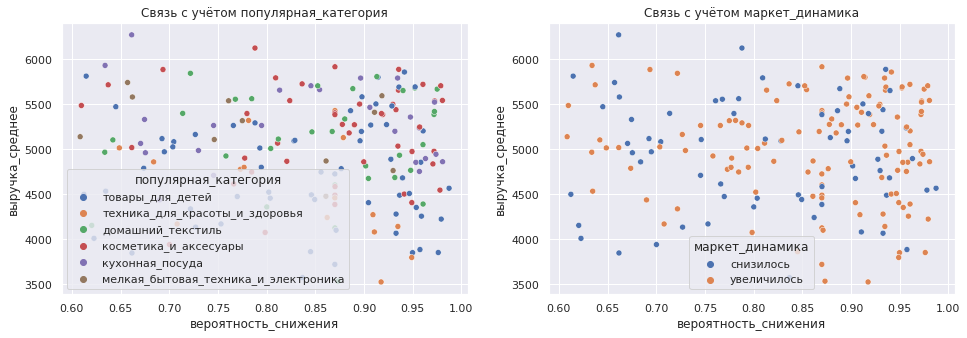

In [128]:
show_scatter(market_explored, "вероятность_снижения", "выручка_среднее", "популярная_категория", "маркет_динамика")

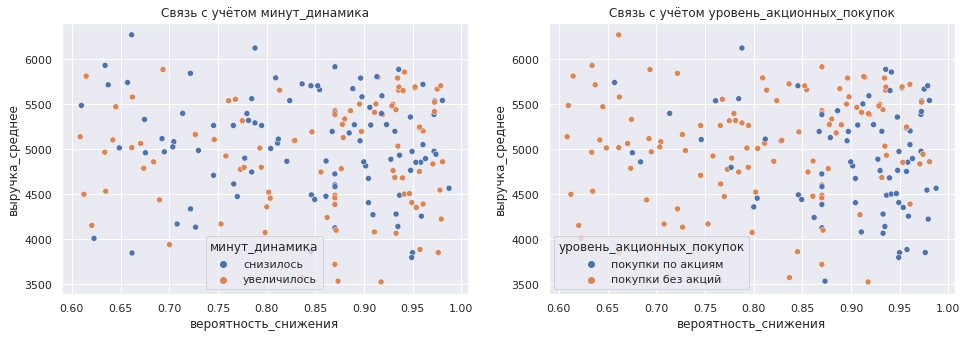

In [129]:
show_scatter(market_explored, "вероятность_снижения", "выручка_среднее", "минут_динамика", "уровень_акционных_покупок")

#### Связь признаков ``вероятность_снижения`` и ``средняя_выручка_со_страницы``

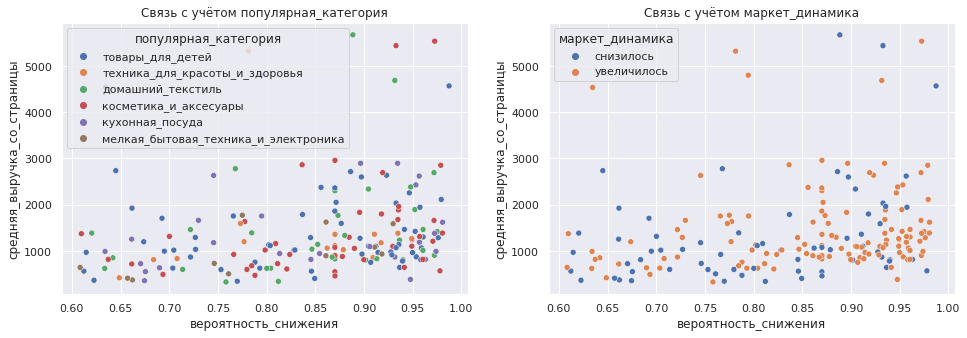

In [130]:
show_scatter(market_explored, "вероятность_снижения", "средняя_выручка_со_страницы", "популярная_категория", "маркет_динамика")

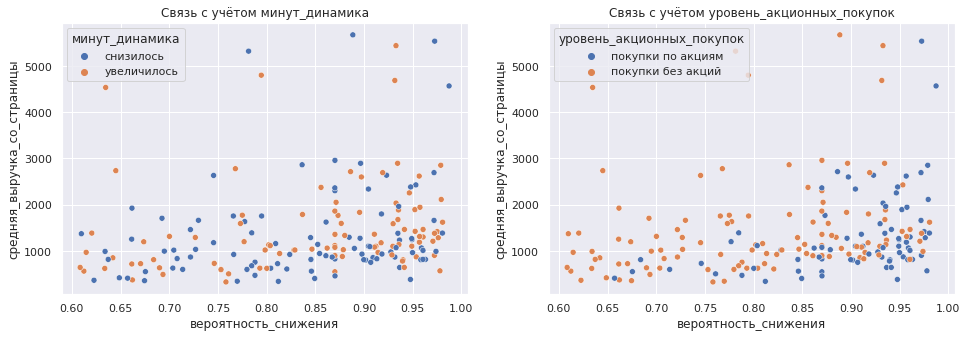

In [131]:
show_scatter(market_explored, "вероятность_снижения", "средняя_выручка_со_страницы",\
             "минут_динамика", "уровень_акционных_покупок")

#### Связь признаков ``вероятность_снижения`` и ``длительность``

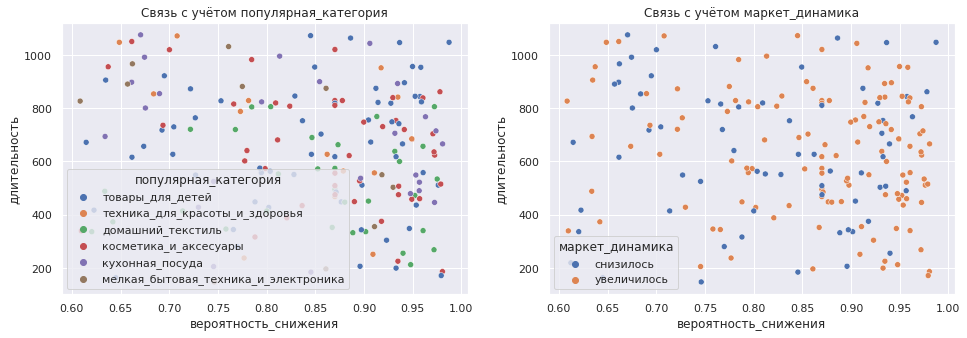

In [132]:
show_scatter(market_explored, "вероятность_снижения", "длительность", "популярная_категория", "маркет_динамика")

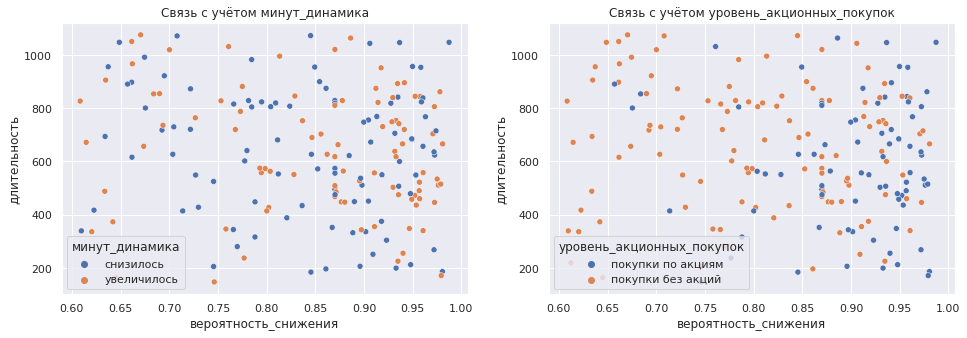

In [133]:
show_scatter(market_explored, "вероятность_снижения", "длительность",\
             "минут_динамика", "уровень_акционных_покупок")

#### Связь признаков ``вероятность_снижения`` и ``средний_просмотр_категорий_за_визит``

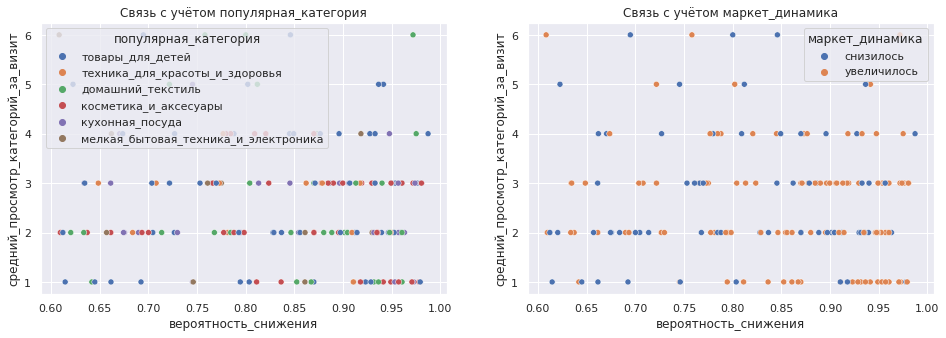

In [134]:
show_scatter(market_explored, "вероятность_снижения", "средний_просмотр_категорий_за_визит",\
             "популярная_категория", "маркет_динамика")

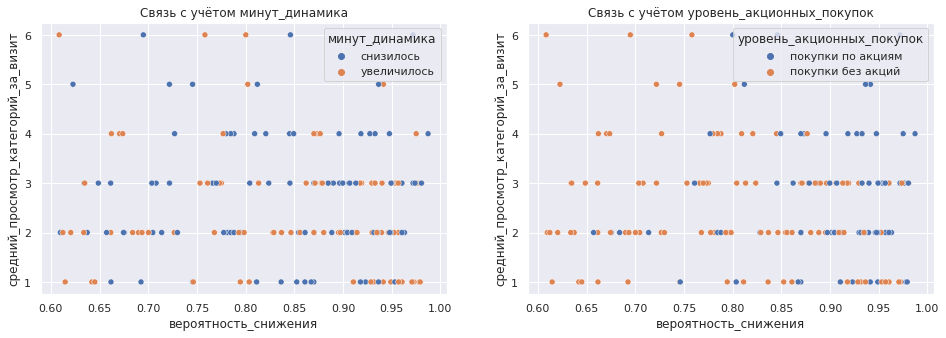

In [135]:
show_scatter(market_explored, "вероятность_снижения", "средний_просмотр_категорий_за_визит",\
             "минут_динамика", "уровень_акционных_покупок")

Исследование выбранной группы показало, что вероятность снижения покупательской активности выше у покупателей:

- со средним просмотром категорий за визит менее трех;
- длительностью использования сервиса менее 900 дней, т.е. за давних клиентов можно быть спокойным;
- средней выручкой со страницы более 2000, т.е. приобретающих разовые дорогостоящие покупки и/или просматривающие мало страниц
- преимущественно покупающих по акции;
- покупающих в категории ``Товары для детей``;
- за последний месяц получающих рассылки чаще среднего.

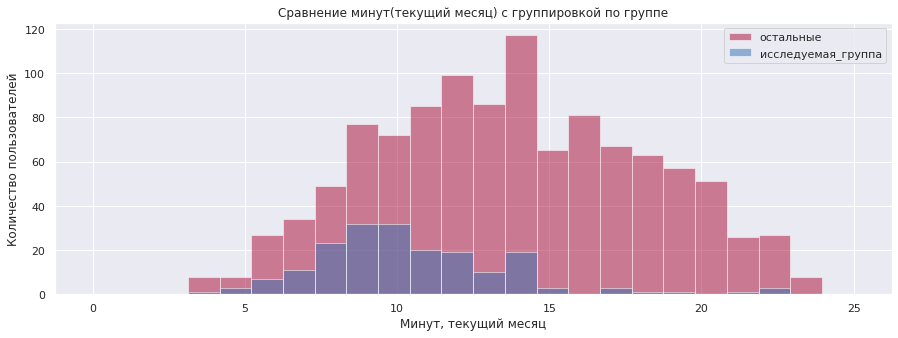

In [136]:
show_hist_selected(combined_dataset, 'минут_тек', 'Минут, текущий месяц',\
                   'Сравнение минут(текущий месяц) с группировкой по группе', 25)

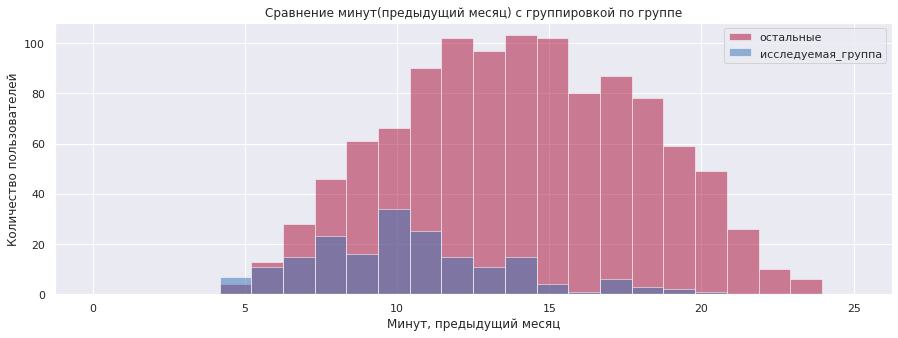

In [137]:
show_hist_selected(combined_dataset, 'минут_пред', 'Минут, предыдущий месяц',\
                   'Сравнение минут(предыдущий месяц) с группировкой по группе', 25)

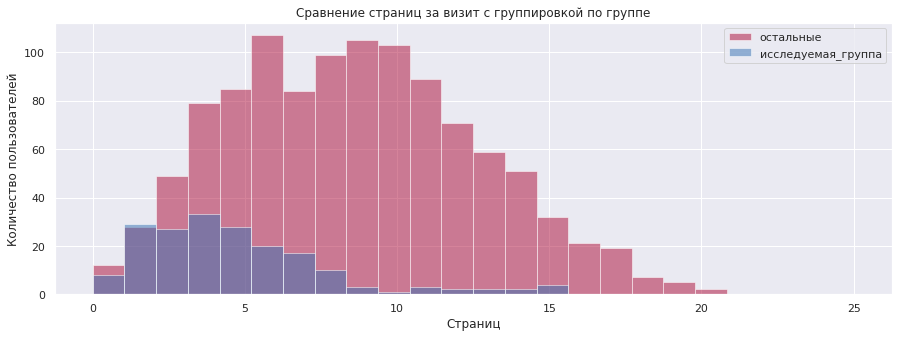

In [138]:
show_hist_selected(combined_dataset, 'страниц_за_визит', 'Страниц', 'Сравнение страниц за визит с группировкой по группе', 25)

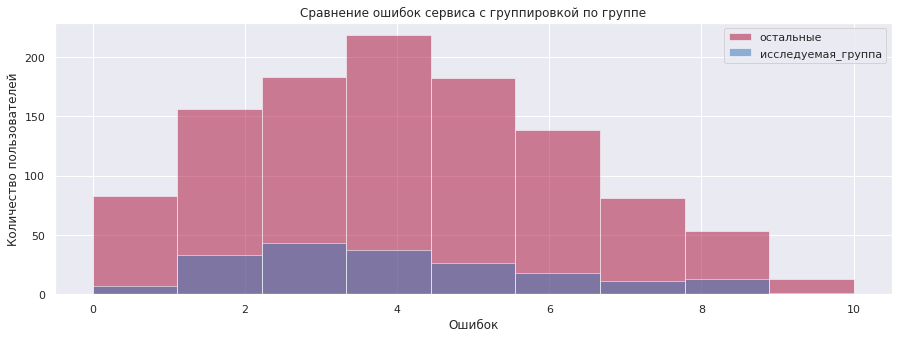

In [139]:
show_hist_selected(combined_dataset, 'ошибка_сервиса', 'Ошибок', 'Сравнение ошибок сервиса с группировкой по группе', 10)

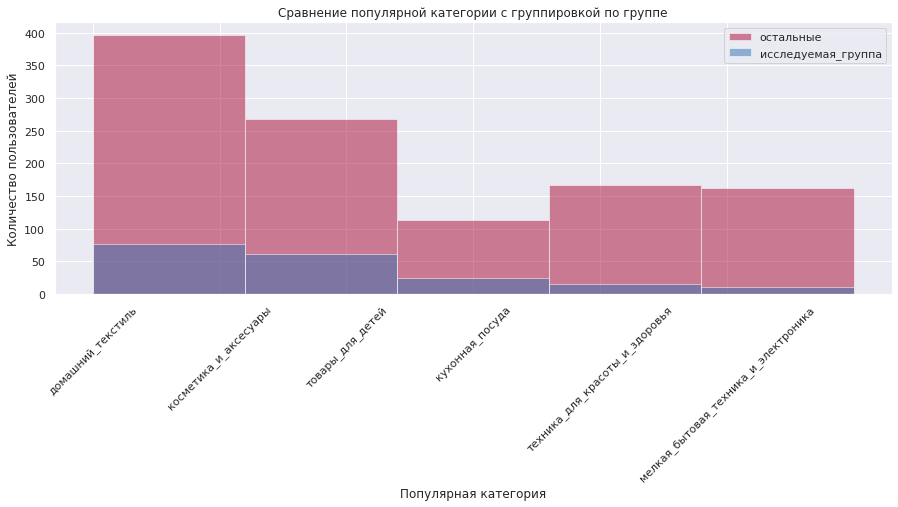

In [140]:
show_hist_selected(combined_dataset, 'популярная_категория', 'Популярная категория',\
          'Сравнение популярной категории с группировкой по группе', 6, 45)

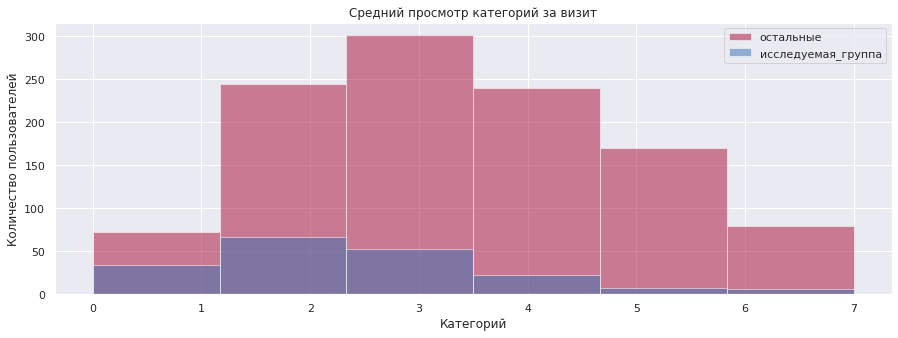

In [141]:
show_hist_selected(combined_dataset, 'средний_просмотр_категорий_за_визит', 'Категорий',\
          'Средний просмотр категорий за визит', 7)

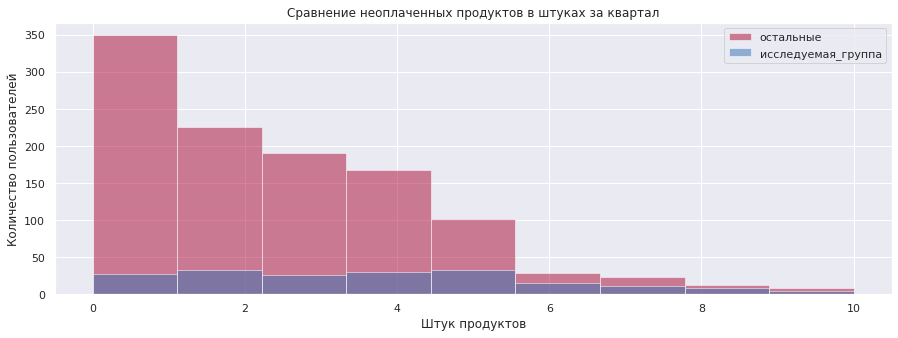

In [142]:
show_hist_selected(combined_dataset, 'неоплаченные_продукты_штук_квартал', 'Штук продуктов',\
          'Сравнение неоплаченных продуктов в штуках за квартал', 10)

Сравнение исследуемой группы с остальными показало, что для исследуемой группы харакетерно :

- меньшее количество минут на сайте за посещение;
- меньшее количество страниц, просмотренных за посещение;
- меньшее количество категорий, просмотренных за посещение;
- меньшее количество ошибок, т.е. эта группа клиентов чувствительнее к наличию ошибок сервиса;
- распределение по категориям аналогичное, однако можно выделить группы товары для детей, косметика и аксессуары и технику для здоровья и красоты, как наиболее популярные;
- большее количество неоплаченных товаров в корзине.

## Общий вывод

**Задача:**
- Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Исходные данные и предобработка**:
- Исходные данные в четырёх датасетах. 
    - ``market_file`` - данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении;
    - ``market_money`` - данные о выручке, которую получает магазин с покупателя;
    - ``market_time`` - данныме о времени (в минутах), которое покупатель провёл на сайте в течение периода;
    - ``money`` - данные о среднемесячной прибыли продавца за последние 3 месяца.
- данные во всех четырёх датасетах выглядят нормально, пропусков нет, типы данных соответствуют значениям;
- во всех датасетах нет дублей;
- во всех датасетах нет пропусков;
- наименования столбцов и значения категориальных данных приведены к единообразию;
- в датасете ``market_file`` в колонке "тип_сервиса" был обнаружен и исправлен неявный дубликат;
- в ``market_time`` в колонке "период" была обнаружена и исправлена опечатка в данных.

**Исследовательский анализ**:


``market_file``:
- Распределение маркетинговой активности за последние полгода похоже на нормальное, со сдвигом в большую сторону;
- В текущем месяце с пользователями коммуницировали преимущественно 4 раза, в целом от 3 до 5 раз;
- Активность большинства пользователей осталась на прежнем уровне, тем не менее число снизивших активность значительно;
- Пользователей "стандарт" более чем в два раза больше, чем "премиум".;
- Примерно 3/4 пользователей согласны на рассылку. Возможно это связано с тем, что рассылка действительно полезна и работает, либо пользователи фильтруют входящие сообщения от магазина;
- Существует группа пользователей, которые предпочитают акционные покупки. Вне акции такие пользователи почти не совершают покупки;
- Магазин открыт уже более трёх лет, распределение стремится к равномерному. Можно увидеть 4 пика с определённым ритмом, возможно это связано с одной из периодических акций магазина по привлечению новых пользователей. Что говорит в пользу стратегии акций;
- Самым большим спросом пользуется категория "товары для детей", далее идут "домашний текстиль", "косметика и аксессуары", "техника для красоты и здоровья", "мелкая бытовая техника" и на последнем месте "кухонная посуда";
- Распределение просмотра категорий за визит - близко к нормальному. В среднем просматривают 3 категории за посещение магазина;
- Небольшое количество продуктов не оплачивается пользователями чаще, возможно это связано с меньшим риском потери средств;
- Распределение ошибок сервиса нормальное, чаще всего пользователи сталкивались с 5-ю ошибками. Так или иначе с ошибками сталкивались почти все пользователи. Поскольку нет данных по критериям логирования ошибок - можно лишь рекомендовать техническому отделу компании обратить на это внимание;
- За визит пользователи смотрят до 20 страниц, чаще - 6.


``market_money``:
- В данных присутствуют выбросы, которые устанены;
- В целом диаграмма выручки по всем периодам стремится к нормальной;
- В предпредыдущем месяце выручка была в диапазоне от 4100 до 5900 руб., с пиком примерно на 4800 руб. Основная масса пользователей принесла выручку от 4400 до 5000 руб. в этом периоде. На диаграмме виден сдвиг влево;
- В предыдущем месяце диапазон выручки увеличился, граница наименьшей выручки стала примерно 2900 руб, наибольшей 6800 руб. Пик примерно на 5000 руб, именно такую выручку принесло больше всего пользователей. Распределение стремится к нормальному;
- В текущем месяце диапазон ещё больше увеличился. Наименьшая выручка как и у предыдущего с 2900 руб., а наибольшая стала примерно 7800 руб. Пик - примерно на 5000, как у предыдущего. Распределение стремится к нормальному;


``market_time``:
- пользователи стали немного меньше проводить времени на сайте в сравнении с прошлым месяцем;
- в среднем на 0.26 мин.


``money``:
- выручка и прибыль имеют разные единицы измерения. Привели значения к рублям
- распределение стремится к нормальному, немного сдвинуто вправо, пик на 5000 руб. В целом график похож на "выручку".

**Лучшая модель**:
- был создан пайплайн для выбора лучшей модели из списка:  KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression и  SVC;
- лучшая модель по результатам отбора -  SVC(метод опорных векторов).

**Общие рекомендации**:
- В группе преобладают покупатели без подписки. Можно рекомендовать заказчику склонить пользователей к подписке и переходу в статус "премиум". Например, через бесплатный период пользования подпиской для теста её пользы. На самые популярные категории товаров делать скидки и акции при наличии подписки. Кроме того, в подписку с разрешения пользователей добавить "премиум" рассылку - "только для своих".
- Имея информацию о том, что активны те, кто тратит больше, можно предложить таким пользователям свою систему скидок. Использовать маркетинговые рычаги для поощрения.

**Рекомендации для выбранного сегмента покупателей**:

Были выделены 4 сегмента клиентов по соотношению вероятности снижения покупательской активности к прибыли:

- с низкой прибылью и высокой вероятностью снижения покупательской активности;
- с низкой прибылью и низкой вероятностью снижения покупательской активности;
- **``с высокой прибылью и высокой вероятностью снижения покупательской активности;``**
- с высокой прибылью и низкой вероятностью снижения покупательской активности.


Для подробного изучения был выбран сегмент - ``группа клиентов с высокой прибылью и высокой вероятностью снижения покупательской активности``.


Анализ параметров, отвечающих за продуктовое поведение и поведение на сайте, позволяет предложить следующие рекомендации:

- клиенты, проводящие на сайте менее 10 минут, имеют склонность к снижению покупательской активности;
- то же можно сказать о клиентах, посещающих менее 5 страниц за визит или просматривающих менее 3 категорий за посещение;
- клиенты, приносящие высокую прибыль, чувствительнее к возникновению ошибок на сайте;
- особое внимание следует уделить клиентам из категорий товары для детей, косметика и аксессуары и техника для красоты;
- для клиентов со снижением покупательской активности свойственно большое количество неоплаченных товаров в корзине;
- требуется дополнительное стимулирование клиентов, приобретающих преимущественно по акциям.


В качестве мер по увеличению покупательской активности среди клиентов, чаще покупающих без акций, можно порекомендовать:

- увеличение вовлеченности клиентов при работе с сайтом: стимулирование к просмотру большего количества страниц, категорий, наполнение контентом, увеличивающим время нахождения клиента на сайте;
- тщательное устранение ошибок сервиса;
- введение напоминаний о наличии неоплаченных товаров в корзине, возможно рассылки, предложение особых условий покупки и пр.;
- особое внимание к категориям ``Товары для детей``, ``Косметика и аксессуары`` и ``Товары для красоты и здоровья``.